## Spam and Ham classifier
Process:-<br>
    1) Text Preprocessing -> Tokenization, Stopwords, Stemming, Lematization, NLTK<br>
    2) Convert Text to Vectors -> BOW,TF_IDF, Word2Vec, AvgWord2Vec

In [163]:
# importing the Dataset

import pandas as pd
import numpy as np

messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])

Above we have used sep='\t' because in the data that we are reading we have lines like => <br>
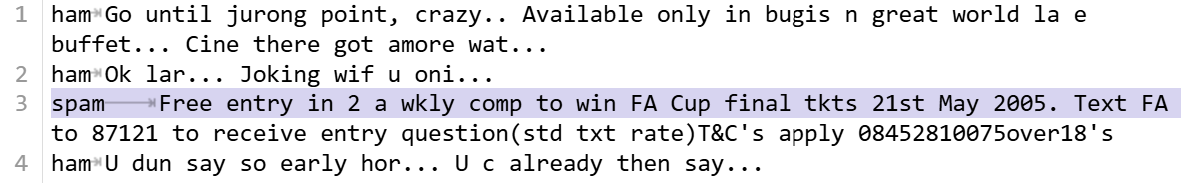

In [164]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [165]:
messages.shape

(5572, 2)

In [166]:
messages['message'].loc[451]

'hanks lotsly!'

### Data cleaning and preprocessing

In [167]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ALANKAR
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [168]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #Used for stemming purpose
ps = PorterStemmer()

In [169]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['message'][i]) #everything apart from words from atoz, Ato Z and numbers 0 to 9
    review = review.lower() #making every word in lower case(remove dublicates)
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [170]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

## Creating the Bag of Words model


In [171]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,binary=True, ngram_range=(2,2)) #max_features=2500 -> top 2500 maximum occuring features & binary -> All the words in terms of binnary
X = cv.fit_transform(corpus).toarray()

In [172]:
X.shape

(5572, 2500)

In [173]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [174]:
y

array([False, False,  True, ..., False, False, False])

In [175]:
y=pd.get_dummies(messages['label']) # This will make unique values present in the 'lable' to form a new column & assign value 0 and 1. 0->not present 1-> present
y=y.iloc[:,1].values

In [177]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [178]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [179]:
X_train, y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([False, False, False, ...,  True, False, False]))

In [180]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [181]:
from sklearn.metrics import accuracy_score,classification_report

In [182]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9721973094170404


In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98       986
        True       0.81      1.00      0.89       129

    accuracy                           0.97      1115
   macro avg       0.90      0.98      0.94      1115
weighted avg       0.98      0.97      0.97      1115



## TF-IDF

In [184]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [185]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [186]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [187]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [188]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9847533632286996


In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       972
        True       0.89      1.00      0.94       143

    accuracy                           0.98      1115
   macro avg       0.95      0.99      0.97      1115
weighted avg       0.99      0.98      0.99      1115



## RF classifier

In [190]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [191]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9838565022421525
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       971
        True       0.89      0.99      0.94       144

    accuracy                           0.98      1115
   macro avg       0.95      0.99      0.97      1115
weighted avg       0.99      0.98      0.98      1115



## Word2vec Implementation

In [47]:
!pip install gensim

In [192]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [193]:
vec_king = wv['king']

In [194]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

## WordNetLemmatizer

In [266]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [267]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [268]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [269]:
corpus[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

## Simple process
(Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.)

In [270]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [271]:
corpus[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [272]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [273]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
 

# Creating word2Vec from scratch

In [274]:
import gensim

In [275]:
### Lets train Word2vec from scratch
model=gensim.models.Word2Vec(words,window=5,min_count=2) #min_count->Ignores all words with total frequency lower than this.

In [276]:
model.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'ok',
 'day',
 'free',
 'know',
 'come',
 'like',
 'time',
 'good',
 'got',
 'love',
 'text',
 'want',
 'send',
 'need',
 'one',
 'txt',
 'today',
 'going',
 'stop',
 'home',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'think',
 'tell',
 'week',
 'hi',
 'phone',
 'new',
 'later',
 'please',
 'pls',
 'co',
 'msg',
 'min',
 'make',
 'night',
 'dear',
 'message',
 'well',
 'say',
 'thing',
 'much',
 'oh',
 'hope',
 'claim',
 'great',
 'hey',
 'give',
 'number',
 'happy',
 'wat',
 'friend',
 'work',
 'way',
 'yes',
 'www',
 'prize',
 'let',
 'right',
 'tomorrow',
 'already',
 'tone',
 'ask',
 'win',
 'said',
 'life',
 'cash',
 'amp',
 'yeah',
 'im',
 'really',
 'meet',
 'babe',
 'find',
 'miss',
 'morning',
 'thanks',
 'last',
 'uk',
 'service',
 'year',
 'anything',
 'care',
 'would',
 'com',
 'also',
 'lol',
 'nokia',
 'feel',
 'every',
 'keep',
 'sure',
 'pick',
 'urgent',
 'sent',
 'contact',


In [277]:
# Total vocabolary sizq
model.corpus_count

5564

In [278]:
model.epochs

5

In [279]:
model.wv.similar_by_word('happy')

[('year', 0.999480128288269),
 ('day', 0.9994384050369263),
 ('amp', 0.9993858337402344),
 ('make', 0.9993808269500732),
 ('love', 0.9993703365325928),
 ('hello', 0.9993434548377991),
 ('like', 0.9993351697921753),
 ('find', 0.9993288516998291),
 ('get', 0.9993268847465515),
 ('even', 0.9993263483047485)]

In [280]:
model.wv['kid'].shape

(100,)

# AvgWord2Veg

In [281]:

def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)
    
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)
# Return mean of every word ---> np.mean
# in document ---> model.wv[word] for word in doc
# and word should always be present in the vocabalory ---> if word in model.wv.index_to_key
        
#It is using CBOW   
    

In [282]:
!pip install tqdm

In [283]:
from tqdm import tqdm

In [284]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
 

In [285]:
type(model.wv.index_to_key)

list

In [286]:
#apply for the entire sentences
X=[]
for i in tqdm(range(len(words))):
    print("Hello",i)
    X.append(avg_word2vec(words[i]))

    

  0%|                                             | 0/5564 [00:00<?, ?it/s]C:\Users\ALANKAR SHARMA\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ALANKAR SHARMA\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  4%|█▎                               | 229/5564 [00:00<00:02, 2278.31it/s]

Hello 0
Hello 1
Hello 2
Hello 3
Hello 4
Hello 5
Hello 6
Hello 7
Hello 8
Hello 9
Hello 10
Hello 11
Hello 12
Hello 13
Hello 14
Hello 15
Hello 16
Hello 17
Hello 18
Hello 19
Hello 20
Hello 21
Hello 22
Hello 23
Hello 24
Hello 25
Hello 26
Hello 27
Hello 28
Hello 29
Hello 30
Hello 31
Hello 32
Hello 33
Hello 34
Hello 35
Hello 36
Hello 37
Hello 38
Hello 39
Hello 40
Hello 41
Hello 42
Hello 43
Hello 44
Hello 45
Hello 46
Hello 47
Hello 48
Hello 49
Hello 50
Hello 51
Hello 52
Hello 53
Hello 54
Hello 55
Hello 56
Hello 57
Hello 58
Hello 59
Hello 60
Hello 61
Hello 62
Hello 63
Hello 64
Hello 65
Hello 66
Hello 67
Hello 68
Hello 69
Hello 70
Hello 71
Hello 72
Hello 73
Hello 74
Hello 75
Hello 76
Hello 77
Hello 78
Hello 79
Hello 80
Hello 81
Hello 82
Hello 83
Hello 84
Hello 85
Hello 86
Hello 87
Hello 88
Hello 89
Hello 90
Hello 91
Hello 92
Hello 93
Hello 94
Hello 95
Hello 96
Hello 97
Hello 98
Hello 99
Hello 100
Hello 101
Hello 102
Hello 103
Hello 104
Hello 105
Hello 106
Hello 107
Hello 108
Hello 109
Hello 110


 15%|████▉                            | 835/5564 [00:00<00:01, 2809.67it/s]

Hello 474
Hello 475
Hello 476
Hello 477
Hello 478
Hello 479
Hello 480
Hello 481
Hello 482
Hello 483
Hello 484
Hello 485
Hello 486
Hello 487
Hello 488
Hello 489
Hello 490
Hello 491
Hello 492
Hello 493
Hello 494
Hello 495
Hello 496
Hello 497
Hello 498
Hello 499
Hello 500
Hello 501
Hello 502
Hello 503
Hello 504
Hello 505
Hello 506
Hello 507
Hello 508
Hello 509
Hello 510
Hello 511
Hello 512
Hello 513
Hello 514
Hello 515
Hello 516
Hello 517
Hello 518
Hello 519
Hello 520
Hello 521
Hello 522
Hello 523
Hello 524
Hello 525
Hello 526
Hello 527
Hello 528
Hello 529
Hello 530
Hello 531
Hello 532
Hello 533
Hello 534
Hello 535
Hello 536
Hello 537
Hello 538
Hello 539
Hello 540
Hello 541
Hello 542
Hello 543
Hello 544
Hello 545
Hello 546
Hello 547
Hello 548
Hello 549
Hello 550
Hello 551
Hello 552
Hello 553
Hello 554
Hello 555
Hello 556
Hello 557
Hello 558
Hello 559
Hello 560
Hello 561
Hello 562
Hello 563
Hello 564
Hello 565
Hello 566
Hello 567
Hello 568
Hello 569
Hello 570
Hello 571
Hello 572
Hello 573


 32%|██████████▏                     | 1767/5564 [00:00<00:01, 2998.37it/s]

Hello 1104
Hello 1105
Hello 1106
Hello 1107
Hello 1108
Hello 1109
Hello 1110
Hello 1111
Hello 1112
Hello 1113
Hello 1114
Hello 1115
Hello 1116
Hello 1117
Hello 1118
Hello 1119
Hello 1120
Hello 1121
Hello 1122
Hello 1123
Hello 1124
Hello 1125
Hello 1126
Hello 1127
Hello 1128
Hello 1129
Hello 1130
Hello 1131
Hello 1132
Hello 1133
Hello 1134
Hello 1135
Hello 1136
Hello 1137
Hello 1138
Hello 1139
Hello 1140
Hello 1141
Hello 1142
Hello 1143
Hello 1144
Hello 1145
Hello 1146
Hello 1147
Hello 1148
Hello 1149
Hello 1150
Hello 1151
Hello 1152
Hello 1153
Hello 1154
Hello 1155
Hello 1156
Hello 1157
Hello 1158
Hello 1159
Hello 1160
Hello 1161
Hello 1162
Hello 1163
Hello 1164
Hello 1165
Hello 1166
Hello 1167
Hello 1168
Hello 1169
Hello 1170
Hello 1171
Hello 1172
Hello 1173
Hello 1174
Hello 1175
Hello 1176
Hello 1177
Hello 1178
Hello 1179
Hello 1180
Hello 1181
Hello 1182
Hello 1183
Hello 1184
Hello 1185
Hello 1186
Hello 1187
Hello 1188
Hello 1189
Hello 1190
Hello 1191
Hello 1192
Hello 1193
Hello 1194

 43%|█████████████▋                  | 2377/5564 [00:00<00:01, 2941.28it/s]

Hello 1768
Hello 1769
Hello 1770
Hello 1771
Hello 1772
Hello 1773
Hello 1774
Hello 1775
Hello 1776
Hello 1777
Hello 1778
Hello 1779
Hello 1780
Hello 1781
Hello 1782
Hello 1783
Hello 1784
Hello 1785
Hello 1786
Hello 1787
Hello 1788
Hello 1789
Hello 1790
Hello 1791
Hello 1792
Hello 1793
Hello 1794
Hello 1795
Hello 1796
Hello 1797
Hello 1798
Hello 1799
Hello 1800
Hello 1801
Hello 1802
Hello 1803
Hello 1804
Hello 1805
Hello 1806
Hello 1807
Hello 1808
Hello 1809
Hello 1810
Hello 1811
Hello 1812
Hello 1813
Hello 1814
Hello 1815
Hello 1816
Hello 1817
Hello 1818
Hello 1819
Hello 1820
Hello 1821
Hello 1822
Hello 1823
Hello 1824
Hello 1825
Hello 1826
Hello 1827
Hello 1828
Hello 1829
Hello 1830
Hello 1831
Hello 1832
Hello 1833
Hello 1834
Hello 1835
Hello 1836
Hello 1837
Hello 1838
Hello 1839
Hello 1840
Hello 1841
Hello 1842
Hello 1843
Hello 1844
Hello 1845
Hello 1846
Hello 1847
Hello 1848
Hello 1849
Hello 1850
Hello 1851
Hello 1852
Hello 1853
Hello 1854
Hello 1855
Hello 1856
Hello 1857
Hello 1858

 49%|███████████████▋                | 2728/5564 [00:00<00:00, 3035.90it/s]

Hello 2378
Hello 2379
Hello 2380
Hello 2381
Hello 2382
Hello 2383
Hello 2384
Hello 2385
Hello 2386
Hello 2387
Hello 2388
Hello 2389
Hello 2390
Hello 2391
Hello 2392
Hello 2393
Hello 2394
Hello 2395
Hello 2396
Hello 2397
Hello 2398
Hello 2399
Hello 2400
Hello 2401
Hello 2402
Hello 2403
Hello 2404
Hello 2405
Hello 2406
Hello 2407
Hello 2408
Hello 2409
Hello 2410
Hello 2411
Hello 2412
Hello 2413
Hello 2414
Hello 2415
Hello 2416
Hello 2417
Hello 2418
Hello 2419
Hello 2420
Hello 2421
Hello 2422
Hello 2423
Hello 2424
Hello 2425
Hello 2426
Hello 2427
Hello 2428
Hello 2429
Hello 2430
Hello 2431
Hello 2432
Hello 2433
Hello 2434
Hello 2435
Hello 2436
Hello 2437
Hello 2438
Hello 2439
Hello 2440
Hello 2441
Hello 2442
Hello 2443
Hello 2444
Hello 2445
Hello 2446
Hello 2447
Hello 2448
Hello 2449
Hello 2450
Hello 2451
Hello 2452
Hello 2453
Hello 2454
Hello 2455
Hello 2456
Hello 2457
Hello 2458
Hello 2459
Hello 2460
Hello 2461
Hello 2462
Hello 2463
Hello 2464
Hello 2465
Hello 2466
Hello 2467
Hello 2468

 69%|██████████████████████          | 3827/5564 [00:01<00:00, 3347.89it/s]

Hello 3081
Hello 3082
Hello 3083
Hello 3084
Hello 3085
Hello 3086
Hello 3087
Hello 3088
Hello 3089
Hello 3090
Hello 3091
Hello 3092
Hello 3093
Hello 3094
Hello 3095
Hello 3096
Hello 3097
Hello 3098
Hello 3099
Hello 3100
Hello 3101
Hello 3102
Hello 3103
Hello 3104
Hello 3105
Hello 3106
Hello 3107
Hello 3108
Hello 3109
Hello 3110
Hello 3111
Hello 3112
Hello 3113
Hello 3114
Hello 3115
Hello 3116
Hello 3117
Hello 3118
Hello 3119
Hello 3120
Hello 3121
Hello 3122
Hello 3123
Hello 3124
Hello 3125
Hello 3126
Hello 3127
Hello 3128
Hello 3129
Hello 3130
Hello 3131
Hello 3132
Hello 3133
Hello 3134
Hello 3135
Hello 3136
Hello 3137
Hello 3138
Hello 3139
Hello 3140
Hello 3141
Hello 3142
Hello 3143
Hello 3144
Hello 3145
Hello 3146
Hello 3147
Hello 3148
Hello 3149
Hello 3150
Hello 3151
Hello 3152
Hello 3153
Hello 3154
Hello 3155
Hello 3156
Hello 3157
Hello 3158
Hello 3159
Hello 3160
Hello 3161
Hello 3162
Hello 3163
Hello 3164
Hello 3165
Hello 3166
Hello 3167
Hello 3168
Hello 3169
Hello 3170
Hello 3171

 81%|█████████████████████████▉      | 4513/5564 [00:01<00:00, 3372.85it/s]

Hello 3827
Hello 3828
Hello 3829
Hello 3830
Hello 3831
Hello 3832
Hello 3833
Hello 3834
Hello 3835
Hello 3836
Hello 3837
Hello 3838
Hello 3839
Hello 3840
Hello 3841
Hello 3842
Hello 3843
Hello 3844
Hello 3845
Hello 3846
Hello 3847
Hello 3848
Hello 3849
Hello 3850
Hello 3851
Hello 3852
Hello 3853
Hello 3854
Hello 3855
Hello 3856
Hello 3857
Hello 3858
Hello 3859
Hello 3860
Hello 3861
Hello 3862
Hello 3863
Hello 3864
Hello 3865
Hello 3866
Hello 3867
Hello 3868
Hello 3869
Hello 3870
Hello 3871
Hello 3872
Hello 3873
Hello 3874
Hello 3875
Hello 3876
Hello 3877
Hello 3878
Hello 3879
Hello 3880
Hello 3881
Hello 3882
Hello 3883
Hello 3884
Hello 3885
Hello 3886
Hello 3887
Hello 3888
Hello 3889
Hello 3890
Hello 3891
Hello 3892
Hello 3893
Hello 3894
Hello 3895
Hello 3896
Hello 3897
Hello 3898
Hello 3899
Hello 3900
Hello 3901
Hello 3902
Hello 3903
Hello 3904
Hello 3905
Hello 3906
Hello 3907
Hello 3908
Hello 3909
Hello 3910
Hello 3911
Hello 3912
Hello 3913
Hello 3914
Hello 3915
Hello 3916
Hello 3917

 93%|█████████████████████████████▊  | 5187/5564 [00:01<00:00, 3228.51it/s]

Hello 4513
Hello 4514
Hello 4515
Hello 4516
Hello 4517
Hello 4518
Hello 4519
Hello 4520
Hello 4521
Hello 4522
Hello 4523
Hello 4524
Hello 4525
Hello 4526
Hello 4527
Hello 4528
Hello 4529
Hello 4530
Hello 4531
Hello 4532
Hello 4533
Hello 4534
Hello 4535
Hello 4536
Hello 4537
Hello 4538
Hello 4539
Hello 4540
Hello 4541
Hello 4542
Hello 4543
Hello 4544
Hello 4545
Hello 4546
Hello 4547
Hello 4548
Hello 4549
Hello 4550
Hello 4551
Hello 4552
Hello 4553
Hello 4554
Hello 4555
Hello 4556
Hello 4557
Hello 4558
Hello 4559
Hello 4560
Hello 4561
Hello 4562
Hello 4563
Hello 4564
Hello 4565
Hello 4566
Hello 4567
Hello 4568
Hello 4569
Hello 4570
Hello 4571
Hello 4572
Hello 4573
Hello 4574
Hello 4575
Hello 4576
Hello 4577
Hello 4578
Hello 4579
Hello 4580
Hello 4581
Hello 4582
Hello 4583
Hello 4584
Hello 4585
Hello 4586
Hello 4587
Hello 4588
Hello 4589
Hello 4590
Hello 4591
Hello 4592
Hello 4593
Hello 4594
Hello 4595
Hello 4596
Hello 4597
Hello 4598
Hello 4599
Hello 4600
Hello 4601
Hello 4602
Hello 4603

100%|████████████████████████████████| 5564/5564 [00:01<00:00, 3115.12it/s]

Hello 5386
Hello 5387
Hello 5388
Hello 5389
Hello 5390
Hello 5391
Hello 5392
Hello 5393
Hello 5394
Hello 5395
Hello 5396
Hello 5397
Hello 5398
Hello 5399
Hello 5400
Hello 5401
Hello 5402
Hello 5403
Hello 5404
Hello 5405
Hello 5406
Hello 5407
Hello 5408
Hello 5409
Hello 5410
Hello 5411
Hello 5412
Hello 5413
Hello 5414
Hello 5415
Hello 5416
Hello 5417
Hello 5418
Hello 5419
Hello 5420
Hello 5421
Hello 5422
Hello 5423
Hello 5424
Hello 5425
Hello 5426
Hello 5427
Hello 5428
Hello 5429
Hello 5430
Hello 5431
Hello 5432
Hello 5433
Hello 5434
Hello 5435
Hello 5436
Hello 5437
Hello 5438
Hello 5439
Hello 5440
Hello 5441
Hello 5442
Hello 5443
Hello 5444
Hello 5445
Hello 5446
Hello 5447
Hello 5448
Hello 5449
Hello 5450
Hello 5451
Hello 5452
Hello 5453
Hello 5454
Hello 5455
Hello 5456
Hello 5457
Hello 5458
Hello 5459
Hello 5460
Hello 5461
Hello 5462
Hello 5463
Hello 5464
Hello 5465
Hello 5466
Hello 5467
Hello 5468
Hello 5469
Hello 5470
Hello 5471
Hello 5472
Hello 5473
Hello 5474
Hello 5475
Hello 5476

In [287]:
X

[array([-0.08973507,  0.27252206,  0.1105229 ,  0.03648677,  0.02635599,
        -0.31113157,  0.0727951 ,  0.5350356 , -0.16591983, -0.15336123,
        -0.15080574, -0.32019594, -0.02373026,  0.11824874,  0.06971539,
        -0.27762327,  0.0126735 , -0.36034694, -0.00819746, -0.4285045 ,
         0.08455941,  0.15285857,  0.11509623, -0.11852654, -0.09530183,
         0.01738731, -0.21082012, -0.15602241, -0.23761378,  0.04047003,
         0.28944585,  0.03826129,  0.13696998, -0.24137585, -0.11697202,
         0.2591911 ,  0.026539  , -0.20496714, -0.15523963, -0.4172341 ,
         0.05795893, -0.25972947, -0.08654147,  0.05743696,  0.23729844,
        -0.13381241, -0.18931852,  0.0376041 ,  0.14333959,  0.23532777,
         0.15949187, -0.280611  , -0.04438036, -0.00906055, -0.14360823,
         0.20262282,  0.16192327, -0.05185998, -0.25981605,  0.05574678,
         0.08303532,  0.14744262, -0.10197694,  0.00235184, -0.27267125,
         0.18178077,  0.10621367,  0.20412111, -0.2

In [288]:
set([type(x) for x in X])

{numpy.float64, numpy.ndarray}

In [289]:
X_new=np.array(X)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5564,) + inhomogeneous part.

In [292]:
X[73] # These are causing the issues

array([False, False,  True, ..., False, False, False])

In [293]:
# Fixing the length

#calculating max length
max_l=0
for i in range(len(X)):
    try:
        if max_l < len(X[i]):
            max_l = len(X[i])
    except:
        print('error at',i, type(X[i]))
        if str(X[i])=='nan':
            #print('Yes!')
            continue
print('Maximum length',max_l)

# Making every word of length equal to maximum length
X_new=[]
y_new=[]
for i in range(len(X)):
    try:
        if max_l > len(X[i]):
            print(i)
            X_new.append(X[i]+[0 for j in range(max_l-len(X[i]))])
            y_new.append(y[i])
        else:
            X_new.append(X[i])
            y_new.append(y[i])
    except:
        if str(X[i])=='nan':
            continue

error at 73 <class 'numpy.float64'>
error at 450 <class 'numpy.float64'>
error at 508 <class 'numpy.float64'>
error at 782 <class 'numpy.float64'>
error at 804 <class 'numpy.float64'>
error at 892 <class 'numpy.float64'>
error at 1443 <class 'numpy.float64'>
error at 1551 <class 'numpy.float64'>
error at 1590 <class 'numpy.float64'>
error at 1833 <class 'numpy.float64'>
error at 1931 <class 'numpy.float64'>
error at 1992 <class 'numpy.float64'>
error at 2320 <class 'numpy.float64'>
error at 2412 <class 'numpy.float64'>
error at 2567 <class 'numpy.float64'>
error at 3735 <class 'numpy.float64'>
error at 3847 <class 'numpy.float64'>
error at 3991 <class 'numpy.float64'>
error at 4280 <class 'numpy.float64'>
error at 4287 <class 'numpy.float64'>
error at 4474 <class 'numpy.float64'>
error at 4848 <class 'numpy.float64'>
error at 5165 <class 'numpy.float64'>
Maximum length 100


In [294]:
X[73]

nan

In [295]:
len(X[1])
max_l-len(X[71])

0

In [296]:
X_new[0]

array([-0.08973507,  0.27252206,  0.1105229 ,  0.03648677,  0.02635599,
       -0.31113157,  0.0727951 ,  0.5350356 , -0.16591983, -0.15336123,
       -0.15080574, -0.32019594, -0.02373026,  0.11824874,  0.06971539,
       -0.27762327,  0.0126735 , -0.36034694, -0.00819746, -0.4285045 ,
        0.08455941,  0.15285857,  0.11509623, -0.11852654, -0.09530183,
        0.01738731, -0.21082012, -0.15602241, -0.23761378,  0.04047003,
        0.28944585,  0.03826129,  0.13696998, -0.24137585, -0.11697202,
        0.2591911 ,  0.026539  , -0.20496714, -0.15523963, -0.4172341 ,
        0.05795893, -0.25972947, -0.08654147,  0.05743696,  0.23729844,
       -0.13381241, -0.18931852,  0.0376041 ,  0.14333959,  0.23532777,
        0.15949187, -0.280611  , -0.04438036, -0.00906055, -0.14360823,
        0.20262282,  0.16192327, -0.05185998, -0.25981605,  0.05574678,
        0.08303532,  0.14744262, -0.10197694,  0.00235184, -0.27267125,
        0.18178077,  0.10621367,  0.20412111, -0.28847086,  0.32

In [297]:
X_new = np.array(X_new)

for 1st sentence we have created a vector of 100 dimention

In [298]:
words[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [299]:
X_new[0]

array([-0.08973507,  0.27252206,  0.1105229 ,  0.03648677,  0.02635599,
       -0.31113157,  0.0727951 ,  0.5350356 , -0.16591983, -0.15336123,
       -0.15080574, -0.32019594, -0.02373026,  0.11824874,  0.06971539,
       -0.27762327,  0.0126735 , -0.36034694, -0.00819746, -0.4285045 ,
        0.08455941,  0.15285857,  0.11509623, -0.11852654, -0.09530183,
        0.01738731, -0.21082012, -0.15602241, -0.23761378,  0.04047003,
        0.28944585,  0.03826129,  0.13696998, -0.24137585, -0.11697202,
        0.2591911 ,  0.026539  , -0.20496714, -0.15523963, -0.4172341 ,
        0.05795893, -0.25972947, -0.08654147,  0.05743696,  0.23729844,
       -0.13381241, -0.18931852,  0.0376041 ,  0.14333959,  0.23532777,
        0.15949187, -0.280611  , -0.04438036, -0.00906055, -0.14360823,
        0.20262282,  0.16192327, -0.05185998, -0.25981605,  0.05574678,
        0.08303532,  0.14744262, -0.10197694,  0.00235184, -0.27267125,
        0.18178077,  0.10621367,  0.20412111, -0.28847086,  0.32

In [300]:
X_new[0].shape

(100,)

In [263]:
# Train & test split
# apply a model

In [301]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.20, random_state = 0)


In [302]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8530207394048692
              precision    recall  f1-score   support

       False       0.99      0.86      0.92      1096
        True       0.02      0.23      0.04        13

    accuracy                           0.85      1109
   macro avg       0.50      0.55      0.48      1109
weighted avg       0.98      0.85      0.91      1109

